# Introduction to Language models (LMs)

Author: Archit Vasan , including materials on LLMs by Varuni Sastri and Carlo Graziani at Argonne, and discussion/editorial work by Taylor Childers, Bethany Lusch, and Venkat Vishwanath (Argonne)

Inspiration from the blog posts "The Illustrated Transformer" and "The Illustrated GPT2" by Jay Alammar, highly recommended reading.

Although the name "language models" is derived from Natural Language Processing, the models used in these approaches can be applied to diverse scientific applications as illustrated below.

## Outline
During this session I will cover:
1. Scientific applications for language models
2. General overview of Transformers
3. Tokenization
4. Model Architecture
5. Pipeline using HuggingFace  
6. Model loading

## Modeling Sequential Data

Sequences are variable-length lists with data in subsequent iterations that depends on previous iterations (or tokens).

Mathematically:
A sequence is a list of tokens: $$T = [t_1, t_2, t_3,...,t_N]$$ where each token within the list depends on the others with a particular probability:

$$P(t_N | t_{N-1}, ..., t_3, t_2, t_1)$$

The purpose of sequential modeling is to learn these probabilities for possible tokens in a distribution to perform various tasks including:
* Sequence generation based on a prompt
* Language translation (e.g. English --> French)
* Property prediction (predicting a property based on an entire sequence)
* Identifying mistakes or missing elements in sequential data

## Scientific sequential data modeling examples

 ### Nucleic acid sequences + genomic data

 <div style="text-align: center">
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/RNA-codons.svg.png?raw=1"
 width="200">
</div>

Nucleic acid sequences can be used to predict translation of proteins, mutations, and gene expression levels.


Here is an image of GenSLM. This is a language model developed by Argonne researchers that can model genomic information in a single model. It was shown to model the evolution of SARS-COV2 without expensive experiments.

<div>

<img src="https://github.com/architvasan/ai_science_local/blob/main/images/genslm.png?raw=1" width="450"/>
</div>

[Zvyagin et. al 2022. BioRXiv](https://www.biorxiv.org/content/10.1101/2022.10.10.511571v1)

### Protein sequences
Protein sequences can be used to predict folding structure, protein-protein interactions, chemical/binding properties, protein function and many more properties.
<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/Protein-Structure-06.png?raw=1" width="400"/>
</div>

<div>
<img src="https://github.com/argonne-lcf/ai-science-training-series/blob/main/04_intro_to_llms/images/ESMFold.png?raw=1" width="700"/>
</div>

[Lin et. al. 2023. Science](https://www.science.org/doi/10.1126/science.ade2574)

### Other applications:

* Biomedical text
* SMILES strings
* Weather predictions
* Interfacing with simulations such as molecular dynamics simulation

## Overview of Language models

We will now briefly talk about the progression of language models.

### Transformers

The most common LMs base their design on the Transformer architecture that was introduced in 2017 in the "Attention is all you need" paper.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/attention_is_all_you_need.png?raw=1" width="500"/>
</div>

[Vaswani 2017. Advances in Neural Information Processing Systems](https://arxiv.org/pdf/1706.03762)

Since then a multitude of LLM architectures have been designed.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/en_chapter1_transformers_chrono.svg?raw=1" width="600"/>
</div>

[HuggingFace NLP Course](https://huggingface.co/learn/nlp-course/chapter1/4)

## Coding example of LLMs in action!

Let's look at an example of running inference with a LLM as a block box to generate text given a prompt and we will also initiate a training loop for an LLM:

Here, we will use the `transformers` library which is as part of HuggingFace, a repository of different models, tokenizers and information on how to apply these models

*Warning: Large Language Models are only as good as their training data. They have no ethics, no judgement, or editing ability. We will be using some pretrained models from Hugging Face which used wide samples of internet hosted text. The datasets have not been strictly filtered to restrict all malign content so the generated text may be surprisingly dark or questionable. They do not reflect our core values and are only used for demonstration purposes.*

In [ ]:
'''
Uncomment below section if running on sophia jupyter notebook
'''
# import os
# os.environ["HTTP_PROXY"]="proxy.alcf.anl.gov:3128"
# os.environ["HTTPS_PROXY"]="proxy.alcf.anl.gov:3128"
# os.environ["http_proxy"]="proxy.alcf.anl.gov:3128"
# os.environ["https_proxy"]="proxy.alcf.anl.gov:3128"
# os.environ["ftp_proxy"]="proxy.alcf.anl.gov:3128"

'\nUncomment below section if running on sophia jupyter notebook\n'

In [ ]:
!pip install transformers
!pip install pandas
!pip install torch

In [ ]:
from transformers import AutoTokenizer,AutoModelForCausalLM, AutoConfig
input_text = "My dog really wanted to eat icecream because"
from transformers import pipeline
generator = pipeline("text-generation", model="gpt2")
pipe = pipeline("text-generation", model="gpt2")
generator(input_text, max_length=20, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'My dog really wanted to eat icecream because the ice cream was really, really tasty," Raine'},
 {'generated_text': 'My dog really wanted to eat icecream because it was so bad."\n\nIt was about the'},
 {'generated_text': 'My dog really wanted to eat icecream because they wanted to use it as a base for the ice'},
 {'generated_text': 'My dog really wanted to eat icecream because the owner could get it in a store if he needed'},
 {'generated_text': "My dog really wanted to eat icecream because she didn't think we could even get her to it"}]

## What's going on under the hood?
There are two components that are "black-boxes" here:

1. The method for tokenization
2. The model that generates novel text.


## Tokenization and embedding of sequential data

Humans can inherently understand language data because they previously learned phonetic sounds.

Machines don’t have phonetic knowledge so they need to be told how to break text into standard units to process it.

They use a system called “tokenization”, where sequences of text are broken into smaller parts, or “tokens”, and then fed as input.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/text-processing---machines-vs-humans.png?raw=1" width="400"/>
</div>

Tokenization is a data preprocessing step which transforms the raw text data into a format suitable for machine learning models. Tokenizers break down raw text into smaller units called tokens. These tokens are what is fed into the language models. Based on the type and configuration of the tokenizer, these tokens can be words, subwords, or characters.

Types of tokenizers:

1. Character Tokenizers: Split text into individual characters.
2. Word Tokenizers: Split text into words based on whitespace or punctuation.
3. Subword Tokenizers: Split text into subword units, such as morphemes or character n-grams. Common subword tokenization algorithms include:
  1. Byte-Pair Encoding (BPE),
  2. SentencePiece,
  3. WordPiece.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/tokenization_image.webp?raw=1" width="400"/>
</div>

[nlpiation](https://nlpiation.medium.com/how-to-use-huggingfaces-transformers-pre-trained-tokenizers-e029e8d6d1fa)

### Example of tokenization
Let's look at an example of tokenization using byte-pair encoding.

In [ ]:
from transformers import AutoTokenizer

# A utility function to tokenize a sequence and print out some information about it.

def tokenization_summary(tokenizer, sequence):

    # get the vocabulary
    vocab = tokenizer.vocab
    # Number of entries to print
    n = 10

    # Print subset of the vocabulary
    print("Subset of tokenizer.vocab:")
    for i, (token, index) in enumerate(tokenizer.vocab.items()):
        print(f"{token}: {index}")
        if i >= n - 1:
            break

    print("Vocab size of the tokenizer = ", len(vocab))
    print("------------------------------------------")

    # .tokenize chunks the existing sequence into different tokens based on the rules and vocab of the tokenizer.
    tokens = tokenizer.tokenize(sequence)
    print("Tokens : ", tokens)
    print("------------------------------------------")

    # .convert_tokens_to_ids or .encode or .tokenize converts the tokens to their corresponding numerical representation.
    #  .convert_tokens_to_ids has a 1-1 mapping between tokens and numerical representation
    # ids = tokenizer.convert_tokens_to_ids(tokens)
    # print("encoded Ids: ", ids)

    # .encode also adds additional information like Start of sequence tokens and End of sequene
    print("tokenized sequence : ", tokenizer.encode(sequence))

    # .tokenizer has additional information about attention_mask.
    # encode = tokenizer(sequence)
    # print("Encode sequence : ", encode)
    # print("------------------------------------------")

    # .decode decodes the ids to raw text
    ids = tokenizer.convert_tokens_to_ids(tokens)
    decode = tokenizer.decode(ids)
    print("Decode sequence : ", decode)


tokenizer_1  =  AutoTokenizer.from_pretrained("gpt2") # GPT-2 uses "Byte-Pair Encoding (BPE)"

sequence = "Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat"

tokenization_summary(tokenizer_1, sequence)

Subset of tokenizer.vocab:
arning: 4228
ATE: 6158
GS: 14313
foo: 21943
Ġghosts: 25899
Ġamino: 23206
ĠDonation: 41654
anas: 15991
ions: 507
ĠVID: 32247
Vocab size of the tokenizer =  50257
------------------------------------------
Tokens :  ['Coun', 'sel', 'or', ',', 'Ġplease', 'Ġadjust', 'Ġyour', 'ĠZoom', 'Ġfilter', 'Ġto', 'Ġappear', 'Ġas', 'Ġa', 'Ġhuman', ',', 'Ġrather', 'Ġthan', 'Ġas', 'Ġa', 'Ġcat']
------------------------------------------
tokenized sequence :  [31053, 741, 273, 11, 3387, 4532, 534, 40305, 8106, 284, 1656, 355, 257, 1692, 11, 2138, 621, 355, 257, 3797]
Decode sequence :  Counselor, please adjust your Zoom filter to appear as a human, rather than as a cat


### Token embedding:

Words are turned into vectors based on their location within a vocabulary.

The strategy of choice for learning language structure from tokenized text is to find a clever way to map each token into a moderate-dimension vector space, adjusting the mapping so that

Similar, or associated tokens take up residence nearby each other, and different regions of the space correspond to different position in the sequence.
Such a mapping from token ID to a point in a vector space is called a token embedding. The dimension of the vector space is often high (e.g. 1024-dimensional), but much smaller than the vocabulary size (30,000--500,000).

Various approaches have been attempted for generating such embeddings, including static algorithms that operate on a corpus of tokenized data as preprocessors for NLP tasks. Transformers, however, adjust their embeddings during training.

## Transformer Model Architecture

Now let's look at the base elements that
make up a Transformer by dissecting the popular GPT2 model

In [ ]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained('gpt2')
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


GPT2 is an example of a Transformer Decoder which is used to generate novel text.

Decoder models use only the decoder of a Transformer model. At each stage, for a given word the attention layers can only access the words positioned before it in the sentence. These models are often called auto-regressive models. The pretraining of decoder models usually revolves around predicting the next word in the sentence.

These models are best suited for tasks involving text generation.

The architecture of GPT-2 is inspired by the paper: "Generating Wikipedia by Summarizing Long Sequences" which is another arrangement of the transformer block that can do language modeling. This model threw away the encoder and thus is known as the “Transformer-Decoder”.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/transformer-decoder-intro.png?raw=1" width="500"/>
</div>

[Illustrated GPT2](https://jalammar.github.io/illustrated-gpt2/)

Key components of the transformer architecture include:

* Input Embeddings: Word embedding or word vectors help us represent words or text as a numeric vector where words with similar meanings have the similar representation.

* Positional Encoding: Injects information about the position of words in a sequence, helping the model understand word order.

* Self-Attention Mechanism: Allows the model to weigh the importance of different words in a sentence, enabling it to effectively capture contextual information.

* Feedforward Neural Networks: Process information from self-attention layers to generate output for each word/token.

* Layer Normalization and Residual Connections: Aid in stabilizing training and mitigating the vanishing gradient problem.

* Transformer Blocks: Comprised of multiple layers of self-attention and feedforward neural networks, stacked together to form the model.

### Attention mechanisms

Since attention mechanisms are arguably the most powerful component of the Transformer, let's discuss this in a little more detail.

Suppose the following sentence is an input sentence we want to translate using an LLM:

`”The animal didn't cross the street because it was too tired”`

To understand a full sentence, the model needs to understand what each word means in relation to other words.

For example, when we read the sentence:
`”The animal didn't cross the street because it was too tired”`
we know intuitively that the word `"it"` refers to `"animal"`, the state for `"it"` is `"tired"`, and the associated action is `"didn't cross"`.

However, the model needs a way to learn all of this information in a simple yet generalizable way.
What makes Transformers particularly powerful compared to earlier sequential architectures is how it encodes context with the **self-attention mechanism**.

As the model processes each word in the input sequence, attention looks at other positions in the input sequence for clues to a better understanding for this word.

<div>
<img src="https://github.com/architvasan/ai_science_local/blob/main/images/transformer_self-attention_visualization.png?raw=1" width="400"/>
</div>

[The Illustrated Transformer](https://jalammar.github.io/illustrated-transformer/)

#### Multi-head attention
In practice, multiple attention heads are used simultaneously.

This:
* Expands the model’s ability to focus on different positions.
* Prevents the attention to be dominated by the word itself.

#### Let's see multi-head attention mechanisms in action!

We are going to use the powerful visualization tool bertviz, which allows an interactive experience of the attention mechanisms. Normally these mechanisms are abstracted away but this will allow us to inspect our model in more detail.

In [ ]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 4.9 MB/s eta 0:00:00


Let's load in the model, GPT2 and look at the attention mechanisms.

**Hint... click on the different blocks in the visualization to see the attention**

In [ ]:
from transformers import AutoTokenizer, AutoModel, utils, AutoModelForCausalLM

from bertviz import model_view
utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = 'openai-community/gpt2'
input_text = "No, I am your father"
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

## Pipeline using HuggingFace

Now, let's see a practical application of LLMs using a HuggingFace pipeline for classification.

This involves a few steps including:
1. Setting up a prompt
2. Loading in a pretrained model
3. Loading in the tokenizer and tokenizing input text
4. Performing model inference
5. Interpreting inference output

In [ ]:
# STEP 0 : Installations and imports
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
import torch
import torch.nn.functional as F

### 1. Setting up a prompt

A "prompt" refers to a specific input or query provided to a language model. They guide the text processing and generation by providing the context for the model to generate coherent and relevant text based on the given input.

The choice and structure of the prompt depends on the specific task, the context and desired output. Prompts can be "discrete" or "instructive" where they are explicit instructions or questions directed to the language model. They can also be more nuanced by more providing suggestions, directions and contexts to the model.

We will use very simple prompts in this tutorial section, but we will learn more about prompt engineering and how it helps in optimizing the performance of the model for a given use case in the following tutorials.

In [ ]:
# STEP 1 : Set up the prompt
input_text = "The panoramic view of the ocean was breathtaking."

### 2. Loading Pretrained Models

The AutoModelForSequenceClassification from_pretrained() method instantiates a sequence classification model.

Refer to https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#automodels for the list of model classes supported.

"from_pretrained" method downloads the pre-trained weights from the Hugging Face Model Hub or the specified URL if the model is not already cached locally. It then loads the weights into the instantiated model, initializing the model parameters with the pre-trained values.

The model cache contains:

* model configuration (config.json)
* pretrained model weights (model.safetensors)
* tokenizer information (tokenizer.json, vocab.json, merges.txt, tokenizer.model)

In [ ]:
# STEP 2 : Load the pretrained model.
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
config = AutoConfig.from_pretrained(model_name)
print(config)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.44.2",
  "vocab_size": 30522
}



### 3. Loading in the tokenizer and tokenizing input text

Here, we load in a pretrained tokenizer associated with this model.

In [ ]:
#STEP 3 : Load the tokenizer and tokenize the input text
tokenizer  =  AutoTokenizer.from_pretrained(model_name)
input_ids = tokenizer(input_text, return_tensors="pt")["input_ids"]
print(input_ids)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tensor([[  101,  1996,  6090,  6525,  7712,  3193,  1997,  1996,  4153,  2001,
          3052, 17904,  1012,   102]])


### 4. Performing inference and interpreting

Here, we:
* load data into the model,
* perform inference to obtain logits,
* Convert logits into probabilities
* According to probabilities assign label

The end result is that we can predict whether the input phrase is positive or negative.

In [ ]:
# STEP 5 : Perform inference
outputs = model(input_ids)
result = outputs.logits
print(result)

# STEP 6 :  Interpret the output.
probabilities = F.softmax(result, dim=-1)
print(probabilities)
predicted_class = torch.argmax(probabilities, dim=-1).item()
labels = ["NEGATIVE", "POSITIVE"]
out_string = "[{'label': '" + str(labels[predicted_class]) + "', 'score': " + str(probabilities[0][predicted_class].tolist()) + "}]"
print(out_string)

tensor([[-4.2767,  4.5486]], grad_fn=<AddmmBackward0>)
tensor([[1.4695e-04, 9.9985e-01]], grad_fn=<SoftmaxBackward0>)
[{'label': 'POSITIVE', 'score': 0.9998530149459839}]


### Saving and loading models

Model can be saved and loaded to and from a local model directory.

In [ ]:
from transformers import AutoModel, AutoModelForCausalLM

# Instantiate and train or fine-tune a model
model = AutoModelForCausalLM.from_pretrained("bert-base-uncased")

# Train or fine-tune the model...

# Save the model to a local directory
directory = "my_local_model"
model.save_pretrained(directory)

# Load a pre-trained model from a local directory
loaded_model = AutoModel.from_pretrained(directory)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## Model Hub
The Model Hub is where the members of the Hugging Face community can host all of their model checkpoints for simple storage, discovery, and sharing.

* Download pre-trained models with the huggingface_hub client library, with Transformers for fine-tuning.
* Make use of Inference API to use models in production settings.
* You can filter for different models for different tasks, frameworks used, datasets used, and many more.
* You can select any model, that will show the model card.
* Model card contains information of the model, including the description, usage, limitations etc. Some models also have inference API's that can be used directly.

Model Hub Link : https://huggingface.co/docs/hub/en/models-the-hub

Example of a model card : https://huggingface.co/bert-base-uncased/tree/main

## Recommended reading

* ["The Illustrated Transformer" by Jay Alammar](https://jalammar.github.io/illustrated-transformer/)
* ["Visualizing A Neural Machine Translation Model (Mechanics of Seq2seq Models With Attention)" by Jay Alammar](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)
* ["The Illustrated GPT-2 (Visualizing Transformer Language Models)"](https://jalammar.github.io/illustrated-gpt2/)
* ["A gentle introduction to positional encoding"](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)
* ["LLM Tutorial Workshop (Argonne National Laboratory)"](https://github.com/brettin/llm_tutorial)
* ["LLM Tutorial Workshop Part 2 (Argonne National Laboratory)"](https://github.com/argonne-lcf/llm-workshop)

## Homework

1. Load in a generative model using the HuggingFace pipeline and generate text using a batch of prompts.
  * Play with generative parameters such as temperature, max_new_tokens, and the model itself and explain the effect on the legibility of the model response. Try at least 4 different parameter/model combinations.
  * Models that can be used include:
    * `google/gemma-2-2b-it`
    * `microsoft/Phi-3-mini-4k-instruct`
    * `meta-llama/Llama-3.2-1B`
    * Any model from this list: [Text-generation models](https://huggingface.co/models?pipeline_tag=text-generation)
    * `gpt2` if having trouble loading these models in
  * This guide should help! [Text-generation strategies](https://huggingface.co/docs/transformers/en/generation_strategies)
2. Load in 2 models of different parameter size (e.g. GPT2, meta-llama/Llama-2-7b-chat-hf, or distilbert/distilgpt2) and analyze the BertViz for each. How does the attention mechanisms change depending on model size?

### Question 1 response:

Increasing `temperature` from 1 to 2, 10, and 100 appears to have caused the resulting text to become increasingly unrelated to the prompt, and eventually also internally inconsistent among other output text.

Increasing `num_beams` from 1 to 5, 10, 15, and 20 appears to have caused the resulting output candidates to be more similar to each other in the initially selected tokens.  This is because the generator considers more candidate sequences while determining which sequence(s) to advance as additional tokens are generated, eventually choosing among the best full sequences (as opposed to choosing the highest-scoring token at each step).  In greedy-search mode (`num_beams=1`), it appears that each candidate sequence may be from a separate run of the generator.  In beam-search mode (`num_beams>1`), it appears that the generator is run once with the multiple beams, and the highest-scoring results among the available beams are returned.  As a result, with high `num_beams` values, it appears as if the returned sequences have more similar meaning to each other despite having increased/deeper variability between the candidate sequences.  For example, with `num_beams=20`, all five returned sequences are referring to 'the best thing that [had] ever happened to [me/her]", [he/she] said.'

Detailed experiment results are below:

#### Question 1 experiment results:

In [ ]:
'''
Uncomment below section if running on sophia jupyter notebook
'''
# import os
# os.environ["HTTP_PROXY"]="proxy.alcf.anl.gov:3128"
# os.environ["HTTPS_PROXY"]="proxy.alcf.anl.gov:3128"
# os.environ["http_proxy"]="proxy.alcf.anl.gov:3128"
# os.environ["https_proxy"]="proxy.alcf.anl.gov:3128"
# os.environ["ftp_proxy"]="proxy.alcf.anl.gov:3128"



In [ ]:
!pip install transformers
!pip install pandas
!pip install torch

In [ ]:
from transformers import AutoTokenizer,AutoModelForCausalLM, AutoConfig
from transformers import pipeline

In [ ]:
input_text = [ "My dog really wanted to eat icecream because",
               #"The only thing we have to fear is",
               #"Mr. Gorbachev, tear down this",
               #"A long long time ago, I can still remember how that music used to make me",
               #"Four score and seven years ago, our fathers"
             ]

def evaluate(params):
    print(f"Params: {params} ...")
    generator = pipeline("text-generation", **params)

    generator_outputs = []
    for prompt in input_text:
        generator_outputs.append(generator(prompt, max_length=25, num_return_sequences=5, pad_token_id=generator.tokenizer.eos_token_id, truncation=True))

    for generator_output in generator_outputs:
        for output in generator_output:
            print(output)

In [ ]:
param_sets = [
    {"model" : "gpt2", "temperature" : 1.0},
    {"model" : "gpt2", "temperature" : 2.0},
    {"model" : "gpt2", "temperature" : 10.0},
    {"model" : "gpt2", "temperature" : 100.0},
]
for params in param_sets:
    evaluate(params)

Params: {'model': 'gpt2', 'temperature': 1.0} ...
{'generated_text': "My dog really wanted to eat icecream because he thought it was better at its original price.\n\nMy pup's dad"}
{'generated_text': "My dog really wanted to eat icecream because he thought it tasted better in the freezer. I didn't like it, so"}
{'generated_text': 'My dog really wanted to eat icecream because he thought this would help him lose weight and he really enjoyed it."\n\n'}
{'generated_text': "My dog really wanted to eat icecream because she'd love it so much. That's the end of the end of it"}
{'generated_text': "My dog really wanted to eat icecream because I didn't realize that his tongue would have been very sensitive to the ice cream"}
Params: {'model': 'gpt2', 'temperature': 2.0} ...
{'generated_text': 'My dog really wanted to eat icecream because he said they were getting paid but my dad actually told me in front (we'}
{'generated_text': "My dog really wanted to eat icecream because it didn't get to look 

In [ ]:
param_sets = [
    {"model" : "gpt2", "temperature" : 1.0, "num_beams" : 1},
    {"model" : "gpt2", "temperature" : 1.0, "num_beams" : 5},
    {"model" : "gpt2", "temperature" : 1.0, "num_beams" : 10},
    {"model" : "gpt2", "temperature" : 1.0, "num_beams" : 15},
    {"model" : "gpt2", "temperature" : 1.0, "num_beams" : 20},
]

for params in param_sets:
    evaluate(params)

Params: {'model': 'gpt2', 'temperature': 1.0, 'num_beams': 1} ...
{'generated_text': 'My dog really wanted to eat icecream because we were getting married."\n\n"I didn\'t want any distractions"\n'}
{'generated_text': 'My dog really wanted to eat icecream because he knows how to put it in his mouth."\n\nMr Langer said'}
{'generated_text': 'My dog really wanted to eat icecream because she loved it. But after several months of eating ice creams, which I'}
{'generated_text': 'My dog really wanted to eat icecream because she is a loving little nittybitty but my grandpa always told me'}
{'generated_text': 'My dog really wanted to eat icecream because if I got in his way and he wanted to see something, I had to'}
Params: {'model': 'gpt2', 'temperature': 1.0, 'num_beams': 5} ...
{'generated_text': "My dog really wanted to eat icecream because it was so good. I don't know if I can eat icecream now"}
{'generated_text': "My dog really wanted to eat icecream because it was so good. I don't know if

In [ ]:
params = {"model" : "meta-llama/Llama-3.2-1B", "temperature" : 1.0}
evaluate(params)

In [ ]:
params = {"model" : "meta-llama/Llama-3.1-8B", "temperature" : 1.0}
evaluate(params)

In [ ]:
params = {"model" : "xai-org/grok-1", "temperature" : 1.0}
evaluate(params)

### Question 2 response:

The BertViz output for the larger GPT2 model (gpt2-xl) had both more heads and more layers, so many more attention graphs were shown.  While both models had several graphs where all words were strongly associated with the first token, when comparing various attention graphs between the two models, it appears as if the larger model has more examples with interesting results.

For example, the following head from the larger model did a decent job of capturing the grammatical relationships between various tokens in the sentence fragment:

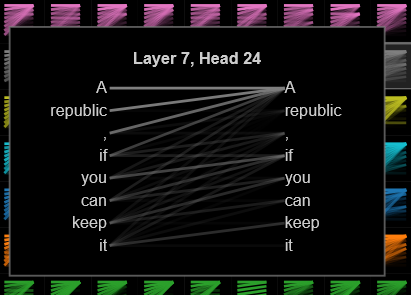

#### Question 2 experiment results:

In [1]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 4.2 MB/s eta 0:00:00


In [6]:
import os
from getpass import getpass
#os.environ['HUGGINGFACEHUB_API_TOKEN'] = getpass('Enter huggingfacehub api token: ')
os.environ['HF_TOKEN'] = getpass('Enter huggingfacehub api token: ')

Enter huggingfacehub api token: ··········


In [3]:
from transformers import AutoTokenizer, AutoModel, utils, AutoModelForCausalLM
from bertviz import model_view

In [9]:
utils.logging.set_verbosity_error()  # Suppress standard warnings
model_name = 'openai-community/gpt2'
input_text = "A republic, if you can keep it"
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

<IPython.core.display.Javascript object>

In [10]:
utils.logging.set_verbosity_error()  # Suppress standard warnings
model_name = 'openai-community/gpt2-xl'
input_text = "A republic, if you can keep it"
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

<IPython.core.display.Javascript object>